# DATA2001 Assignment 2 (Weight: 25%)


The aim of this assignment is to gain practical experience in analysing unstructured data. 
You should only submit your completed Jupyter notebook in .ipynb format via Blackboard, including written answers in markdown and results from executed code cells.


The assignment comprises 5 main tasks: Data Exploration, Data Preprocessing, Model Training, Model Evaluation, and Model Analysis. You will analyze and compare two different representations, Bag of Words (BOW) and Term Frequency-Inverse Document Frequency (TF-IDF). Additionally, you will address and compare two tasks: sentiment analysis and rating prediction.


The dataset you will work with in this assignment comprises text reviews about various hotels, extracted from Tripadvisor, along with their corresponding ratings.


## Task 1: Data Exploration





1. Load the dataset from the file "hotel_reviews.csv". How many records does the dataset contain? How many distinct classes are there in the dataset?


In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
hotel_reviews = pd.read_csv("hotel_reviews.csv")
# How many records does the dataset contain
hotel_reviews.shape

(20491, 2)

There are 20491 rows and 2 columns.

In [3]:
# concise summary of the dataset
hotel_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [4]:
# Display first five rows of the data
hotel_reviews.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


2. Determine the top 10 most frequently used words in the dataset. To support your answer, create a bar plot where the x-axis represents words, and the y-axis represents the frequency of each word appearing in the entire dataset.


In [5]:
from collections import Counter
import matplotlib.pyplot as plt
import re

In [6]:
#combine all reviews into one text
all_reviews = " ".join(hotel_reviews["Review"])

#remove punctuation
words = re.findall(r'\b\w+\b', all_reviews.lower())

#count the frequency of each word
word_counts = Counter(words)

#get the top 10 most frequent words
top_words = word_counts.most_common(10)

top_words

[('hotel', 49814),
 ('room', 35331),
 ('not', 31709),
 ('great', 21475),
 ('t', 19525),
 ('n', 19097),
 ('good', 17412),
 ('staff', 16633),
 ('stay', 15411),
 ('did', 14006)]

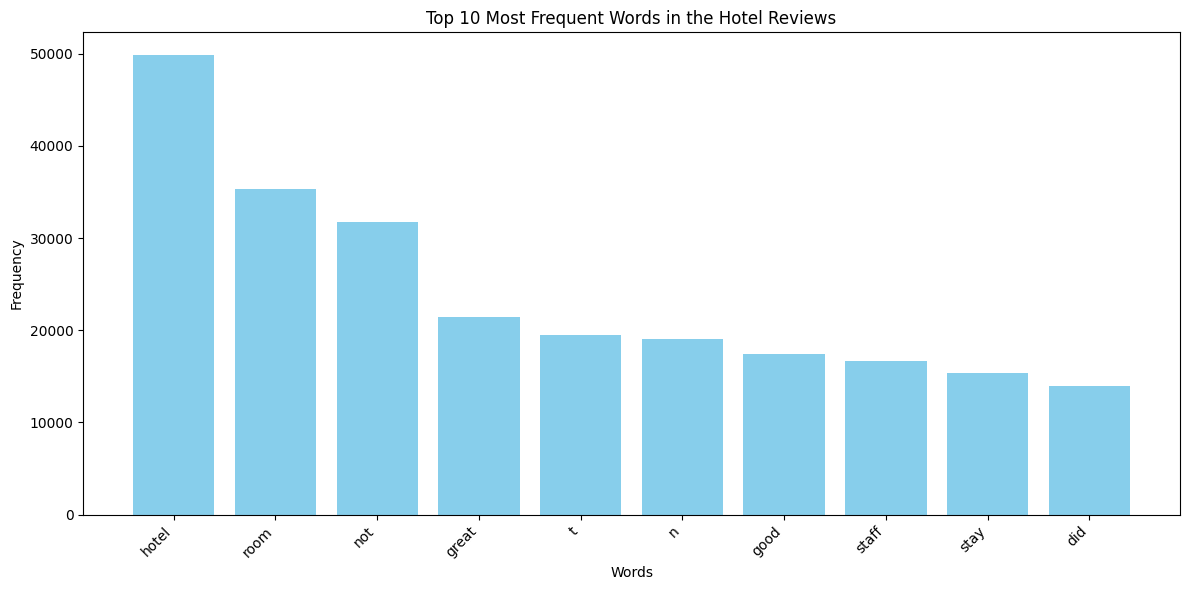

In [7]:
#extract the top words and their frequencies
top_words, top_frequencies = zip(*top_words)

#create bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in the Hotel Reviews')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

From the bar plot above, we can see which words are the most frequent in the reviews. However, it is evident that a few words are common stop words with no meaning, hence doesn't tell us a lot about the reviews.



3. Among the top 10 most frequently used words, identify if there are any stop words included. If we exclude the stop words, would the top 10 most frequent words change? Create another bar plot similar to Question 2, but this time with the stop words removed to illustrate the updated top 10 most frequent words.

In [8]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4773516/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/s4773516/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /home/s4773516/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
#combine all reviews into one text
all_reviews = " ".join(hotel_reviews["Review"])

# Tokenize the text and remove stopwords and punctuation
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
words = re.findall(r'\b\w+\b', all_reviews.lower())
filtered_words = [word for word in words if word not in stop_words]

#count the frequency of each word
word_counts = Counter(filtered_words)

#get the top 10 most frequent words
top_words = word_counts.most_common(10)

top_words



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/s4773516/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('hotel', 49814),
 ('room', 35331),
 ('great', 21475),
 ('n', 19097),
 ('good', 17412),
 ('staff', 16633),
 ('stay', 15411),
 ('nice', 12643),
 ('rooms', 12401),
 ('location', 11351)]

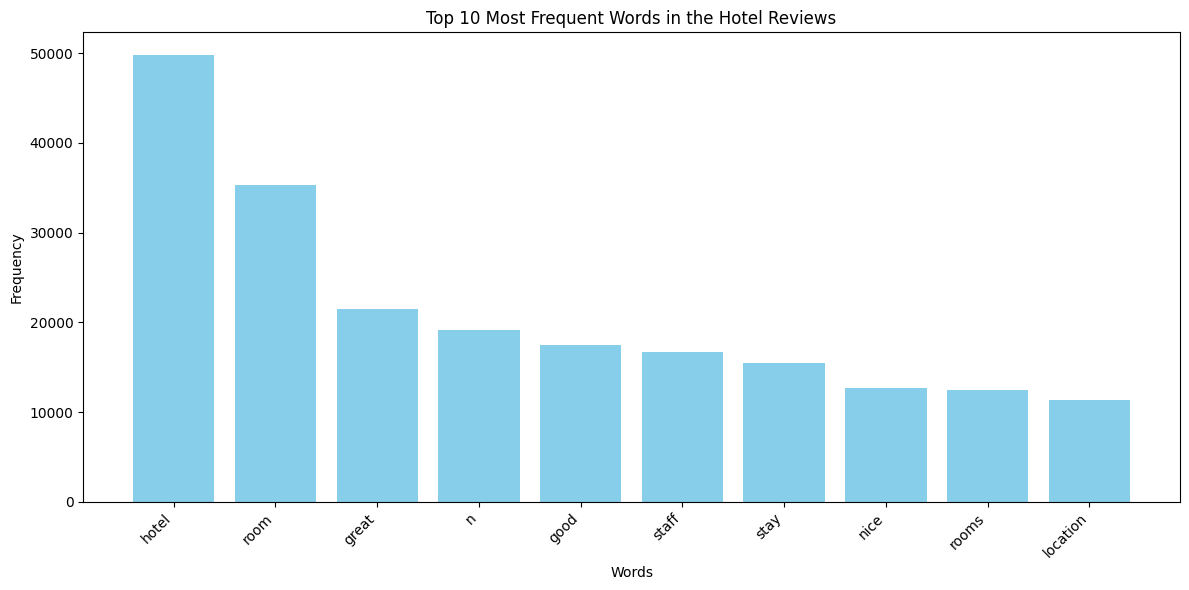

In [10]:
#extract the top words and their frequencies
top_words, top_frequencies = zip(*top_words)

#create bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_frequencies, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words in the Hotel Reviews')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

We can see that the stopwords have been removed and so now the most common words in reviews give an indication of what works well for them.

## Task 2: Data Preprocessing

- Use the provided "clean_data" function to remove unnecessary symbols and clean the dataset.



In [11]:
import re

def clean_data(text):
    
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'br', ' ', text)
    text = re.sub(r'\'', ' ', text)
    

    return text

In [12]:
hotel_reviews["Review"] = hotel_reviews["Review"].apply(clean_data)


In [13]:
#check to see if it is now clean
hotel_reviews.loc[2, "Review"]

'nice rooms not 4  experience hotel monaco seattle good hotel n t 4  level positives large bathroom mediterranean suite comfortable bed pillowsattentive housekeeping staffnegatives ac unit malfunctioned stay desk disorganized  missed 3 separate wakeup calls  concierge busy hard touch  did n t provide guidance special requests tv hard use ipod sound dock suite non functioning  decided book mediterranean suite 3 night weekend stay 1st choice rest party filled  comparison w spent 45 night larger square footage room great soaking tub whirlpool jets nice shower before stay hotel arrange car service price 53 tip reasonable driver waiting arrival checkin easy downside room picked 2 person jacuzi tub no bath accessories salts bubble bath did n t stay  night got 12 1a checked voucher bottle champagne nice gesture fish waiting room  impression room huge open space felt room big  tv far away bed chore change channel  ipod dock  oken disappointing in morning way asked desk check thermostat said 65

We can see that the function has worked as there is no punctuation or unwanted characters

- Split the clean dataset into separate train and test sets. For this, use the "Review" field as the feature vector (X) and the "Rating" field as the label vector (Y).

In [14]:
from sklearn.model_selection import train_test_split
random_state = np.random.RandomState(0)

In [15]:
X = hotel_reviews["Review"]
y = hotel_reviews["Rating"]

# split the data into train-test split where 30% of data will be used as test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=random_state)

- Create an additional binary label by assigning ‘1’ – positive for the product ratings 4 and 5; and "–1" for product ratings 1, 2 and 3. Store it in y_train_binary and y_test_binary. 

*Tip: you can use a function copy.deepcopy for creating a copy of label variables*

In [16]:
import copy

In [17]:
def convert_to_binary_label(rating):
    if rating >= 4:
        return 1  # Positive
    else:
        return -1  # Not Positive
    
# Create binary labels for y_train and y_test
y_train_binary = y_train.apply(convert_to_binary_label)
y_test_binary = y_test.apply(convert_to_binary_label)


- Transform the cleaned data into a numerical representation using Bag of Words (BoW) and remove any stop words. Save the BoW representation in the variables train_data_BOW and test_data_BOW.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stopwords.words('english'), min_df=0.01)
# fit the vectorizer to fit train data
train_data_BOW = vectorizer.fit_transform(X_train)
# get the BOW for train data
X_train_BOW = vectorizer.transform(X_train)


- Create another numerical representation of the text using Term Frequency-Inverse Document Frequency (TfIdf) and remove the stop words. Save the TfIdf representation in the variables train_data_tfidf and test_data_tfidf.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
# fit the TFIDF vectorizer to fit train data
train_data_tfidf = tfidf_vectorizer.fit_transform(X_train)
# get the BOW for train data
test_data_tfidf = tfidf_vectorizer.transform(X_test)


## Task 3: Model Training

Define 3 Logistic Regression models: *model1, model2* and *model3* and train the models as follows:
- Train the first Logistic Regression model using the Bag of Words representation (train_data_BOW) to predict the hotel rating (Y).

- Train the second Logistic Regression model using the TfIdf representation (train_data_tfidf) to predict the hotel rating (Y).

- Train the third Logistic Regression model using the TfIdf representation (train_data_tfidf) to predict the binary sentiment label (Y_binary). 

- Make and store predictions on appropriate test sets (X_test_BOW for model1 and X_test_tfidf for model2 and model3)

In [20]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=random_state)
model1.fit(X_train_BOW,y_train)


LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF8CE7DF40)

In [21]:
# create BOW for test data
X_test_BOW = vectorizer.transform(X_test)

# predict using log_reg object
y_test_model1_predictions = model1.predict(X_test_BOW)

# view the predictions
y_test_model1_predictions

array([2, 1, 5, ..., 5, 4, 5])

The predictions may not be accurate so we will evaluate the model later on.

In [22]:
model2 = LogisticRegression(random_state=random_state)  # You can adjust max_iter as needed
model2.fit(train_data_tfidf, y_train)  # Use Y_train here

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF8CE7DF40)

In [23]:
y_test_model2_predictions = model2.predict(test_data_tfidf)

# View the predictions
y_test_model2_predictions

array([2, 4, 5, ..., 5, 5, 5])

We can see that the predictions vary slightly from model 1's predictions, so we still do not know about the accuracy, therefore we will evaluate the model later on.

In [24]:
model3 = LogisticRegression(random_state=random_state)  # You can adjust max_iter as needed
model3.fit(train_data_tfidf, y_train_binary)

LogisticRegression(random_state=RandomState(MT19937) at 0x7FFF8CE7DF40)

In [25]:
y_test_model3_predictions = model3.predict(test_data_tfidf)

# View the predictions
y_test_model3_predictions

array([-1, -1,  1, ...,  1,  1,  1])

In this binary model, -1 represents a negative sentiment, while 1 represents a positive sentiment. These sentiments tend to agree with the model 1 results, however again we do not know if it is accurate, so we will conduct further evaluation.


## Task 4: Model Evaluation

- Compute and compare the test accuracy of Model 1 (Logistic Regression with BoW representation) and Model 2 (Logistic Regression with TfIdf representation). Based on your results, determine which embedding method yields higher performance in predicting the hotel ratings (Y).

In [26]:
from sklearn.metrics import accuracy_score

accuracy_model1 = accuracy_score(y_test, y_test_model1_predictions)
accuracy_model1

0.5655497722836695

In [27]:
accuracy_model2 = accuracy_score(y_test, y_test_model2_predictions)
accuracy_model2

0.6099544567338973

From the results above, it is clear that Model 2 has a higher accuracy than Model 1, although the difference is not very large. Model 1 has an accuracy of approximately 56.6% and Model 2 has an accuracy of approximately 61%. Thus, Model 2 is more accurate than Model 1.

- Compute and compare the test accuracy of Model 2 and Model 3. Based on your results, analyze which task is easier: binary sentiment prediction or multi-class rating prediction.

In [28]:
accuracy_model2 = accuracy_score(y_test, y_test_model2_predictions)
accuracy_model2

0.6099544567338973

In [29]:
accuracy_model3 = accuracy_score(y_test_binary, y_test_model3_predictions)
accuracy_model3

0.8919973975276513

From the results above, it is clear that Model 3 has a higher accuracy than Model 2, by a relatively significant difference. Model 3 has an accuracy of approximately 89.2% and Model 2 has an accuracy of approximately 61%. Thus, Model 3 is more accurate than Model 2. This is likely as the binary model only has 2 options.



- For Model 2,  compute additional evaluaton measures, namely confusion matrix, precision and recall.  

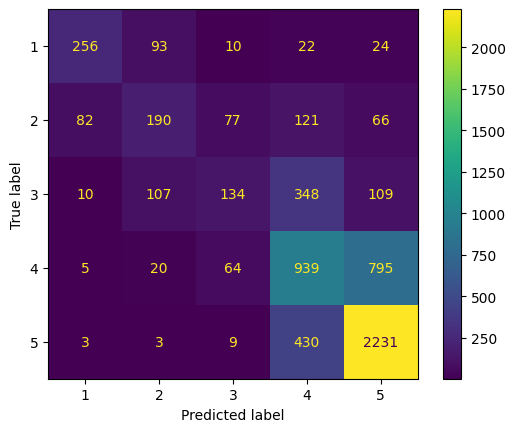

In [30]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, y_test_model2_predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
display.plot();

Let's interpret the confusion matrix and derieve some useful metrics:
-> if we follow the rule of positive being ratings that are 4 or 5, and negative being under that.

Model correctly identified 959 negative sentiment tweets as negative. (True Negative - TN)

Model correctly identified 4395 positive sentiment tweets as positive. (True Positive - TP)

Model incorrectly identified 104 positive sentiment tweets as negative. (False Negative - FN)

Model incorrectly identified 690 negative sentiment tweets as positive. (False Positive - FP)

Precision = TP/(TP+FP) = 4395/(4395+690) = 0.8643
It means out of 100 times when model predicted positive sentiment, it was 86 times actually positive. This is pretty high

In [31]:
recall = np.sum(4395 / (4395 + 104))
recall

0.9768837519448766

This displays a high recall score. It evaluates the ability of a model to correctly identify all relevant instances (positives) from the total number of relevant instances in a dataset. 

## Task 5: Model Analysis



- Based on the confusion matrix obtained in the previous question (referring to Model 2, the Logistic Regression with TfIdf representation for rating prediction), identify and state the number of samples that were classified to have the rating of 5 (the highest rating), but in reality, they had an actual rating of 1 (the lowest rating).

24 samples were predicted to have a 5 star rating, but actually had a 1 star rating.


- Discuss the importance of considering alternative evaluation measures, such as precision and recall, instead of relying solely on accuracy. Based on this discussion, identify the most suitable evaluation metric for Model 2.

Relying solely on accuracy to evaluate a model can be misleading. Especially when dealing with imbalanced datasets, where one class greatly outnumbers the other. Thus, alternative evaluation measures like precision and recall must be used as they provide further insights. Precision helps assess the accuracy of positive predictions, while recall is a ratio that measures the model's ability to find all positive cases. Moreover, they also consider the different types of prediction errors. Precision and recall provide a clearer picture. For Model 2, which predicts ratings, accuracy is a good thing to consider, but precision and recall should be considered as there are guaranteed to be prediction errors. The choice ultimately depends on the specific goals and consequences of the rating predictions.


- For binary sentiment prediction (Model 3), visualize important words with their model coefficients.  

*Tip: you can reuse the function plot_coefficients from prac. session.*

In [32]:
def plot_coefficients(classifier, feature_names):
    coef = classifier.coef_.ravel()
    sorted_coefficients = np.argsort(coef)
    top_negative_coefficients = sorted_coefficients[:10]
    top_positive_coefficients = sorted_coefficients[-10:]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    top_words = feature_names[top_coefficients]
    top_coefficient_values = coef[top_coefficients]
    # Create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in top_coefficient_values]
    plt.bar(np.arange(len(top_coefficients)), top_coefficient_values, color=colors)
    plt.xticks(np.arange(len(top_coefficients)), top_words, rotation=90, ha='right')
    plt.xlabel("Important Words")
    plt.ylabel("Model Coefficient")
    plt.title("Top 20 Important Words for Sentiment Prediction")
    plt.show()


In [33]:
plot_coefficients(model3, feature_names)

NameError: name 'feature_names' is not defined

From the plot above, we can see which words are the most common for both positive and negative sentiment reviews.